In [1]:
#Step 0: Setup & Data Loading
# import libraries and load the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

# Load datasets (replace filenames with yours)
client_data = pd.read_csv("client_data.csv")  
price_data = pd.read_csv("price_data.csv")  

# Quick Client preview
client_data.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [2]:
# Quick Price preview
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [3]:
#Step 1: Exploratory Data Analysis (EDA)
#1.1 Check Data Structure
# Basic info
client_data.info()
price_data.info()

# Check for missing values
print("Missing Values (client Data):\n", client_data.isnull().sum())
print("\nMissing Values (Price Data):\n", price_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [4]:
#Descriptive statistics of data(Data types)
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [5]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [6]:
client_data.columns


Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [7]:
price_data.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [8]:
# Merge datasets on customer ID
merged_data = pd.merge(client_data, price_data, on="id")

# Convert dates to datetime
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_cols:
    merged_data[col] = pd.to_datetime(merged_data[col])

C:\Users\Venus\AppData\Local\Temp\ipykernel_27608\2725525643.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=merged_data, palette='viridis')


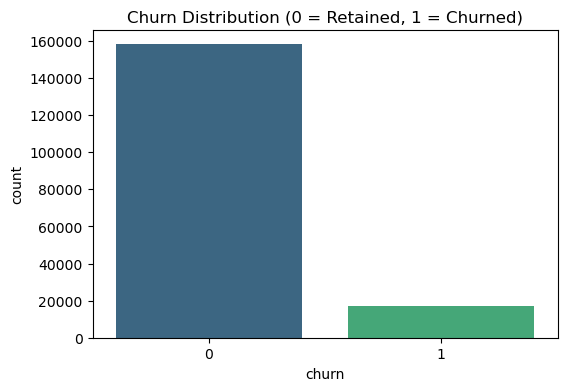

Overall churn rate: 9.71%


In [9]:
#Step 2: Key Visualizations to Explore Churn Patterns
#1. Churn Distribution (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=merged_data, palette='viridis')
plt.title('Churn Distribution (0 = Retained, 1 = Churned)')
plt.show()

# Churn rate
churn_rate = merged_data['churn'].mean()
print(f"Overall churn rate: {churn_rate:.2%}")

C:\Users\Venus\AppData\Local\Temp\ipykernel_27608\4184426953.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='avg_var_price', data=merged_data, palette='coolwarm')


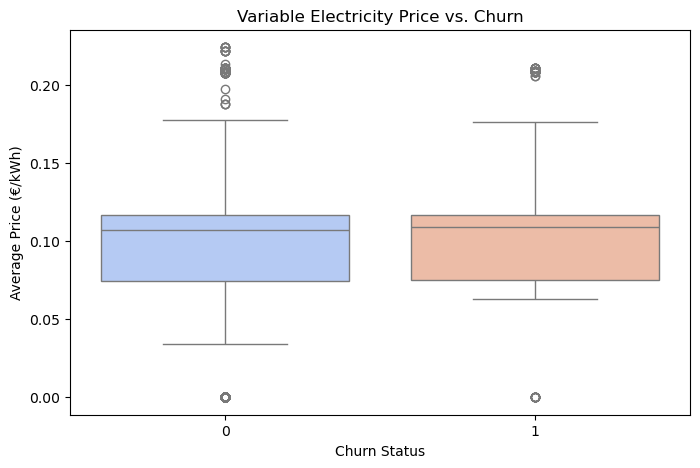

In [10]:
#2. Price Sensitivity Analysis
#A. Average Price vs. Churn
# Calculate mean price across peak/off-peak
merged_data['avg_var_price'] = (merged_data['price_off_peak_var'] + merged_data['price_peak_var']) / 2

plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='avg_var_price', data=merged_data, palette='coolwarm')
plt.title('Variable Electricity Price vs. Churn')
plt.ylabel('Average Price (€/kWh)')
plt.xlabel('Churn Status')
plt.show()

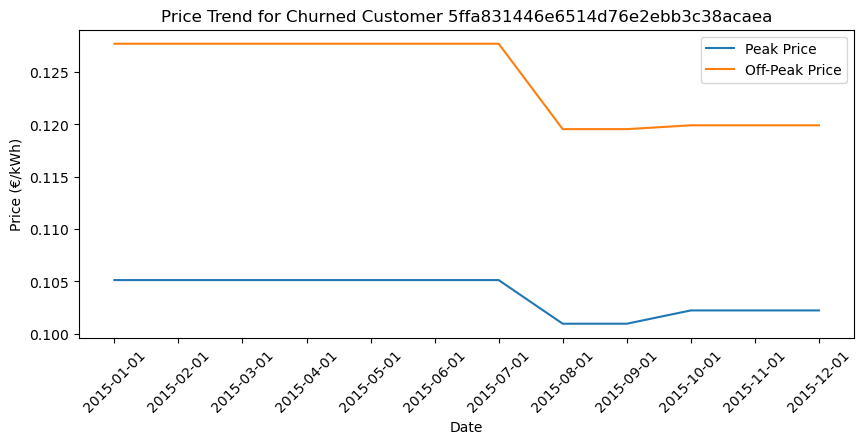

In [11]:
#B. Price Changes Over Time (Example for 1 Customer)
# Pick a random churned customer
sample_churned = merged_data[merged_data['churn'] == 1]['id'].sample(1).values[0]
customer_prices = price_data[price_data['id'] == sample_churned]

plt.figure(figsize=(10, 4))
plt.plot(customer_prices['price_date'], customer_prices['price_peak_var'], label='Peak Price')
plt.plot(customer_prices['price_date'], customer_prices['price_off_peak_var'], label='Off-Peak Price')
plt.title(f'Price Trend for Churned Customer {sample_churned}')
plt.xlabel('Date')
plt.ylabel('Price (€/kWh)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

C:\Users\Venus\AppData\Local\Temp\ipykernel_27608\3773059499.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='cons_12m', data=merged_data, showfliers=False, palette='muted')


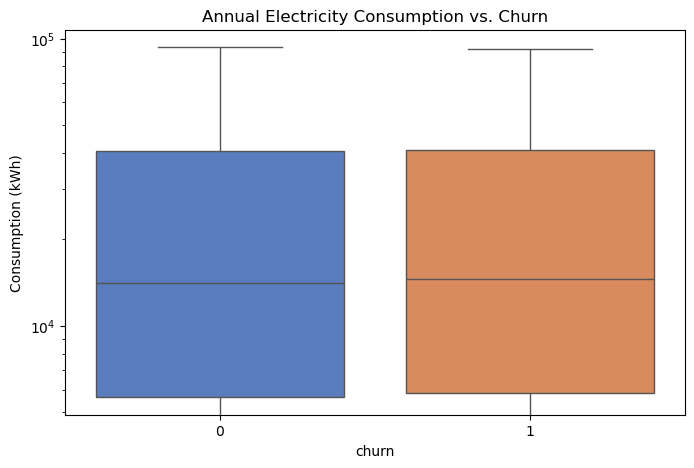

In [12]:
#3. Consumption Patterns
#A. Annual Consumption vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='cons_12m', data=merged_data, showfliers=False, palette='muted')
plt.title('Annual Electricity Consumption vs. Churn')
plt.ylabel('Consumption (kWh)')
plt.yscale('log')  # Helps with skewed data
plt.show()

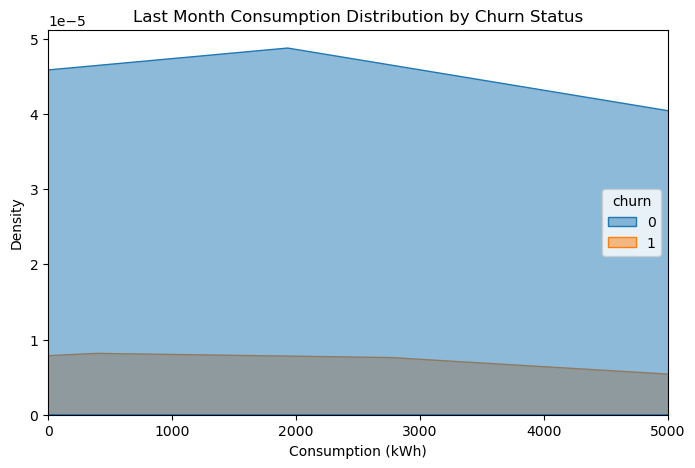

In [13]:
#B. Last Month's Consumption Comparison
plt.figure(figsize=(8, 5))
sns.kdeplot(data=merged_data, x='cons_last_month', hue='churn', fill=True, alpha=0.5)
plt.title('Last Month Consumption Distribution by Churn Status')
plt.xlabel('Consumption (kWh)')
plt.xlim(0, 5000)  # Adjust based on your data
plt.show()

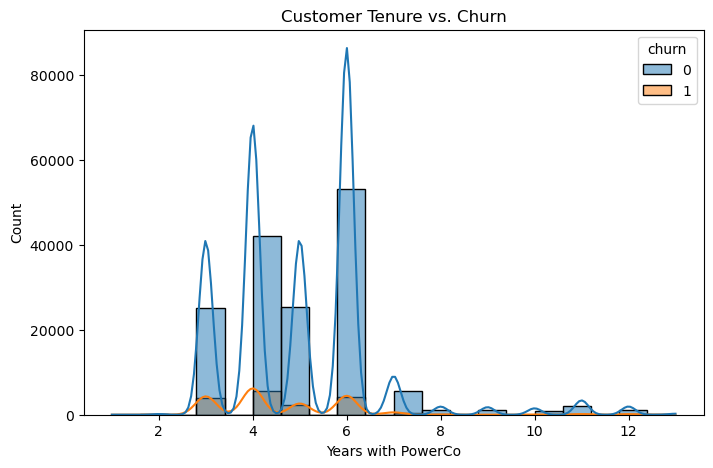

In [14]:
#4. Contract & Tenure Analysis
#A. Tenure (Years Active) vs. Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=merged_data, x='num_years_antig', hue='churn', bins=20, kde=True)
plt.title('Customer Tenure vs. Churn')
plt.xlabel('Years with PowerCo')
plt.show()

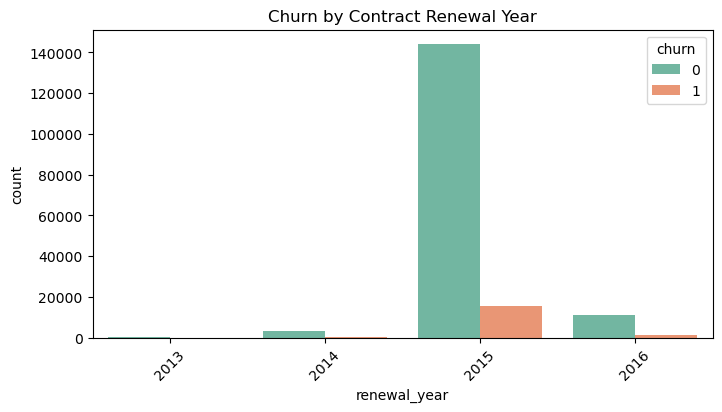

In [15]:
#B. Renewal Year Impact
merged_data['renewal_year'] = merged_data['date_renewal'].dt.year
plt.figure(figsize=(8, 4))
sns.countplot(x='renewal_year', hue='churn', data=merged_data, palette='Set2')
plt.title('Churn by Contract Renewal Year')
plt.xticks(rotation=45)
plt.show()

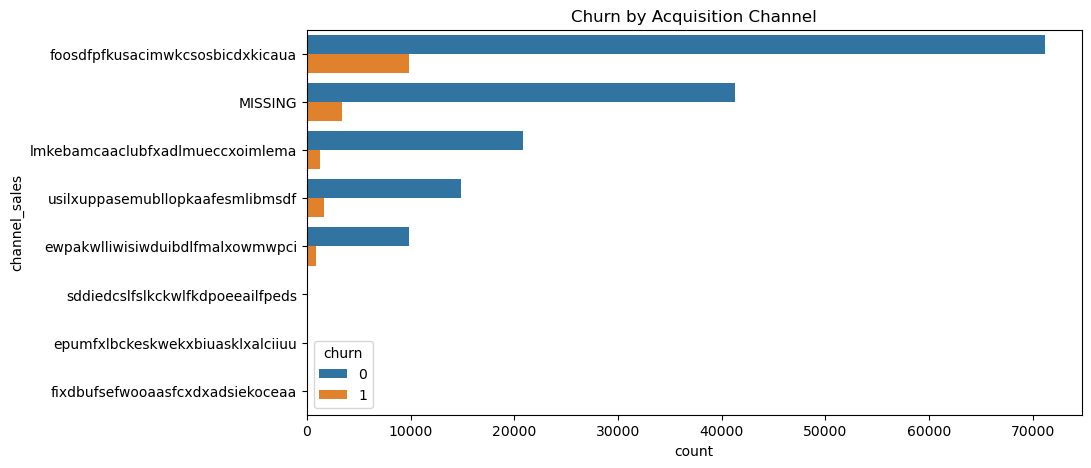

In [16]:
#5. Additional Factors
plt.figure(figsize=(10, 5))
sns.countplot(y='channel_sales', hue='churn', data=merged_data, order=merged_data['channel_sales'].value_counts().index)
plt.title('Churn by Acquisition Channel')
plt.show()


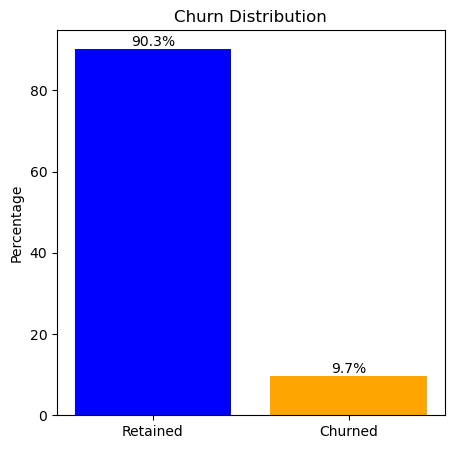

In [17]:
# Calculate churn percentages
churn_counts = merged_data['churn'].value_counts(normalize=True) * 100

# Plot with matplotlib
plt.figure(figsize=(5, 5))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['blue', 'orange'])
plt.title("Churn Distribution")
plt.xticks([0, 1], ["Retained", "Churned"])
plt.ylabel("Percentage")

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f"{height:.1f}%",
             ha="center", va="bottom")

plt.show()

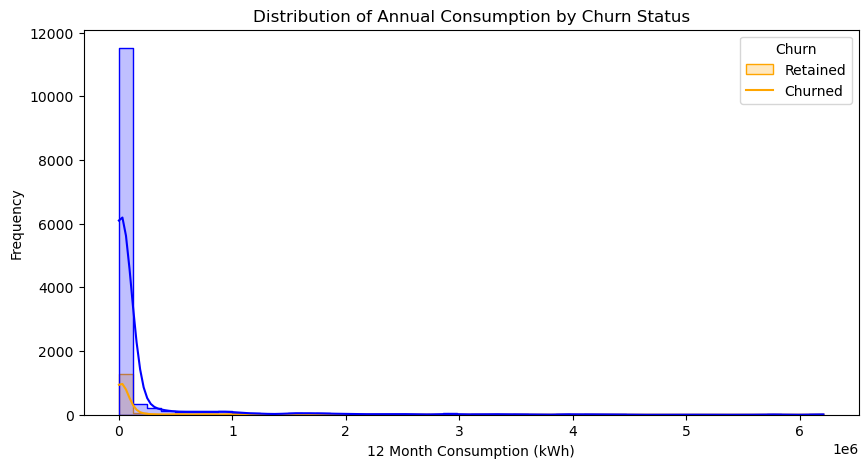

In [18]:
#Annotate_bars 
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

plt.figure(figsize=(10, 5))
sns.histplot(data=consumption, x='cons_12m', hue='churn', bins=50, kde=True, 
             palette={0: 'blue', 1: 'orange'}, 
             element='step', common_norm=False)
plt.title('Distribution of Annual Consumption by Churn Status')
plt.xlabel('12 Month Consumption (kWh)')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['Retained', 'Churned'])
plt.show()

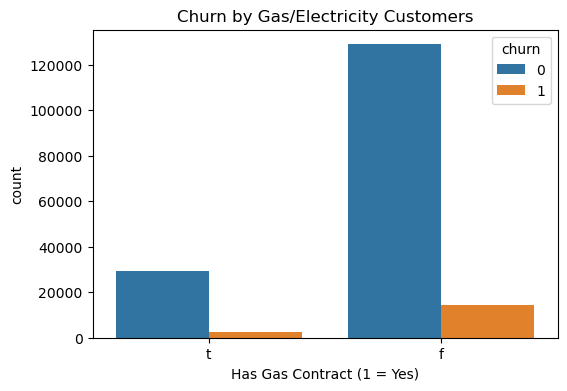

In [19]:
#5. Additional Factors
#A. Gas vs. Electricity Only Customers
plt.figure(figsize=(6, 4))
sns.countplot(x='has_gas', hue='churn', data=merged_data)
plt.title('Churn by Gas/Electricity Customers')
plt.xlabel('Has Gas Contract (1 = Yes)')
plt.show()

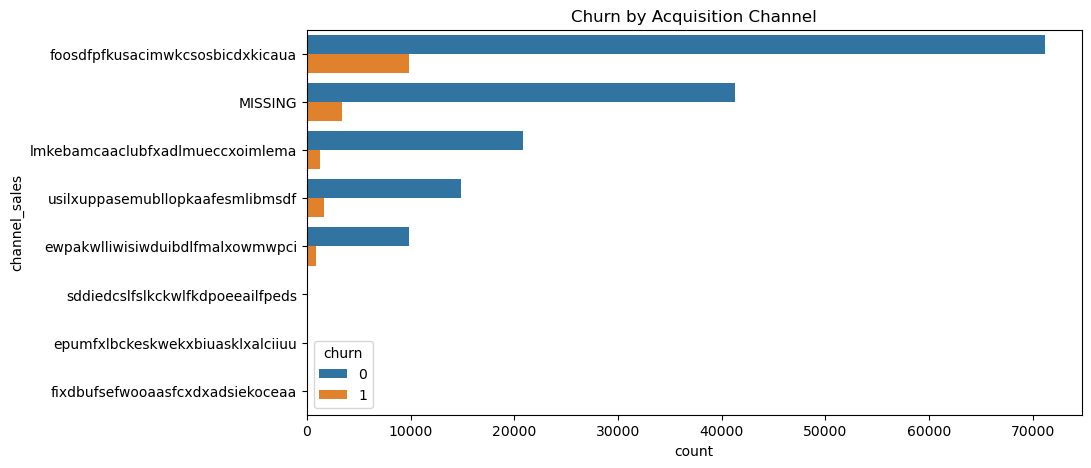

In [20]:
#B. Sales Channel Impact
plt.figure(figsize=(10, 5))
sns.countplot(y='channel_sales', hue='churn', data=merged_data, order=merged_data['channel_sales'].value_counts().index)
plt.title('Churn by Acquisition Channel')
plt.show()

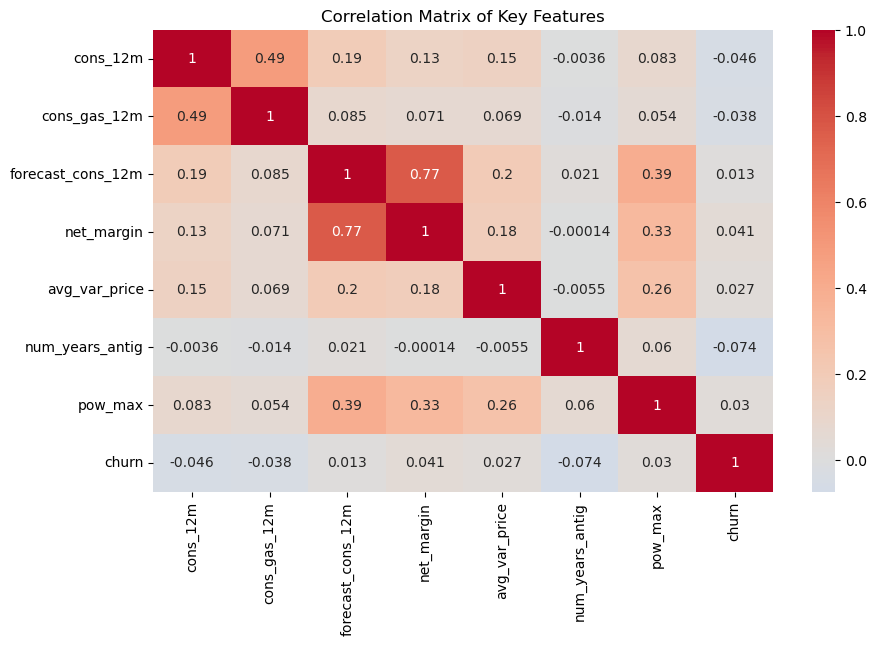

In [21]:
#Step 3: Correlation & Advanced Visuals
#1. Numeric Feature Correlations
# Select numeric columns
numeric_cols = ['cons_12m', 'cons_gas_12m', 'forecast_cons_12m', 'net_margin', 
                'avg_var_price', 'num_years_antig', 'pow_max']

plt.figure(figsize=(10, 6))
corr_matrix = merged_data[numeric_cols + ['churn']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Features')
plt.show()

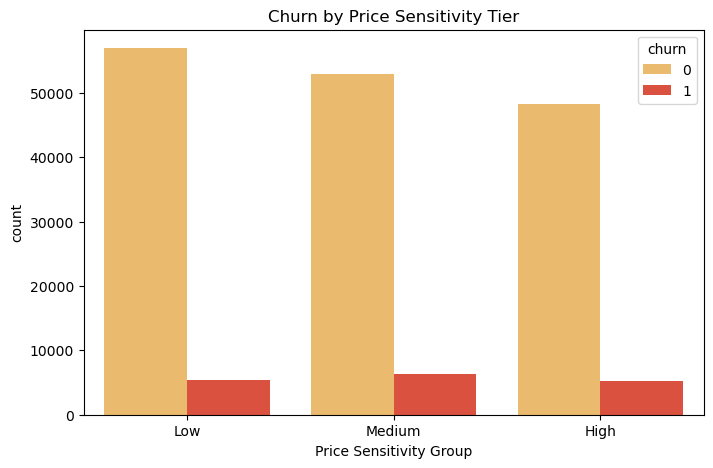

In [22]:
#2. Price Sensitivity Segments
# Create price sensitivity groups
merged_data['price_sensitivity'] = pd.qcut(merged_data['avg_var_price'], q=3, 
                                          labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 5))
sns.countplot(x='price_sensitivity', hue='churn', data=merged_data, palette='YlOrRd')
plt.title('Churn by Price Sensitivity Tier')
plt.xlabel('Price Sensitivity Group')
plt.show()